# UCD - Certificate in Introductory Data Analytics - Final Project

#### 1. Module Import

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#### 2. Data Import

In [30]:
# Access Suicide Rates Overview Dataset from kaggle.com
# Download flat CSV file of datasaet and save as Dog_Bite_Incidents.csv
# Importing data from CSV file to Phyton as Phyton DataFrame

filename = 'suicide_rates_overview.csv'
suicide = pd.read_csv(filename)

#### 3. Data Exploration

In [31]:
suicide.head() # Overview of first few rows of the DataFrame

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [32]:
suicide.info() # Overview of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [33]:
suicide.shape # Overview of number of rows and columns

(27820, 12)

In [34]:
suicide.describe() # Computing basic summary statistics

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [35]:
suicide. dtypes # Overview of column data types

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [36]:
suicide.isna ().any () # Detecting missing values in dataset

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [37]:
suicide.isna ().sum () # Number of missing values by column 

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

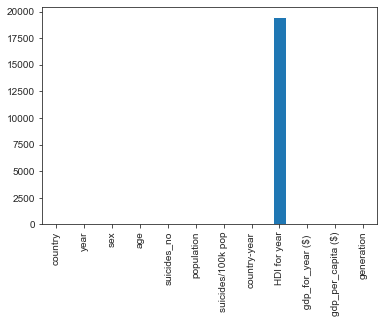

In [38]:
suicide.isna (). sum(). plot (kind="bar") # Visualizing missing values in the dataset using a bar plot
plt.show

In [39]:
suicide.values # Overview of DataFrame components - NumPy Array

array([['Albania', 1987, 'male', ..., '2,156,624,900', 796,
        'Generation X'],
       ['Albania', 1987, 'male', ..., '2,156,624,900', 796, 'Silent'],
       ['Albania', 1987, 'female', ..., '2,156,624,900', 796,
        'Generation X'],
       ...,
       ['Uzbekistan', 2014, 'male', ..., '63,067,077,179', 2309,
        'Generation Z'],
       ['Uzbekistan', 2014, 'female', ..., '63,067,077,179', 2309,
        'Generation Z'],
       ['Uzbekistan', 2014, 'female', ..., '63,067,077,179', 2309,
        'Boomers']], dtype=object)

In [40]:
suicide.columns # Overview of DataFrame components - Column names

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [41]:
suicide.index # Overview of DataFrame components - Row numbers

RangeIndex(start=0, stop=27820, step=1)

#### 4. Data Manipulation

In [42]:
# Change column names for  for simplicity
# suicides_no, suicides/100k pop, HDI for year and gdp_for_year ($)  
suicide.rename (columns = {'suicides_no' : 'suicides'}, inplace = True)
suicide.rename (columns = {'suicides/100k pop' : 'suicides/100k'}, inplace = True)
suicide.rename (columns = {'HDI for year' : 'HDI'}, inplace = True)
suicide.rename (columns = {' gdp_for_year ($) ' : 'gdp in $'}, inplace = True)

In [43]:
### Preparing Dataframe containing suicide data of World ###

# Subsetting a list of relevant columns
# Ommitting column country-year due to repeat information 
# Omitting column HDI due to  high rate of missing values (19456 out of 27820 - 70%) 
# Saving as suicide-subsetted
suicide_subsetted = suicide[["country", "year", "sex", "age", "suicides", "population", "suicides/100k", "gdp in $", "gdp_per_capita ($)", "generation"]]

# Sorting rows by alphabetical country name, year, sex and age and saving it as suicide_sorted
suicide ['age'] = pd.Categorical (suicide ['age'], ["5-14 years","15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
suicide_sorted = suicide_subsetted.sort_values (["country", "year", "sex", "age"])

# Setting column country as the index and saving it as final dataframe suicide_world
suicide_world = suicide_sorted.set_index ("country")

print (suicide_world)

            year     sex          age  suicides  population  suicides/100k  \
country                                                                      
Albania     1987  female  15-24 years        14      289700           4.83   
Albania     1987  female  25-34 years         4      257200           1.56   
Albania     1987  female  35-54 years         6      278800           2.15   
Albania     1987  female   5-14 years         0      311000           0.00   
Albania     1987  female  55-74 years         0      144600           0.00   
...          ...     ...          ...       ...         ...            ...   
Uzbekistan  2014    male  25-34 years       318     2739150          11.61   
Uzbekistan  2014    male  35-54 years       519     3421300          15.17   
Uzbekistan  2014    male   5-14 years        60     2762158           2.17   
Uzbekistan  2014    male  55-74 years       144     1271111          11.33   
Uzbekistan  2014    male    75+ years        17      224995     

In [44]:
### Preparing Dataframe containing suicide data of Ireland over 29 year period ###

# Subset rows of data related to Ireland and saving it as suicide_ireland_row_subsetted
suicide_ireland_row_subsetted = suicide[suicide["country"] == "Ireland"] 

# Subsetting a list of relevant columns
# Ommitting column country-year due to repeat information 
# Omitting column HDI due to  high rate of missing values (19456 out of 27820 - 70%) 
# Saving it as suicide_ireland_column_subsetted
suicide_ireland_column_subsetted = suicide_ireland_row_subsetted [["country", "year", "sex", "age", "suicides", "population", "suicides/100k", "gdp in $", "gdp_per_capita ($)", "generation"]]

# Sorting rows by alphabetical country name, year, sex and age and saving it as suicide_ireland_sorted
suicide ['age'] = pd.Categorical (suicide ['age'], ["5-14 years","15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
suicide_ireland_sorted = suicide_ireland_column_subsetted.sort_values (["country", "year", "sex", "age"])

# Setting column country as the index and saving it as final dataframe suicide_ireland
suicide_ireland = suicide_ireland_sorted.set_index ("country")

print (suicide_ireland)

         year     sex          age  suicides  population  suicides/100k  \
country                                                                   
Ireland  1985  female   5-14 years         0      342300           0.00   
Ireland  1985  female  15-24 years         3      303600           0.99   
Ireland  1985  female  25-34 years        11      248300           4.43   
Ireland  1985  female  35-54 years        24      353200           6.80   
Ireland  1985  female  55-74 years        21      274200           7.66   
...       ...     ...          ...       ...         ...            ...   
Ireland  2014    male  15-24 years        63      267635          23.54   
Ireland  2014    male  25-34 years        80      337977          23.67   
Ireland  2014    male  35-54 years       165      675986          24.41   
Ireland  2014    male  55-74 years        81      421555          19.21   
Ireland  2014    male    75+ years         8      103238           7.75   

                gdp in $

In [45]:
### Preparing Dataframe containing suicide data of Ireland over 14 year period ###

# Subset rows of data related to Ireland and saving it as suicide_ireland_row_subsetted
suicide_ireland_row_subsetted = suicide[suicide["country"] == "Ireland"] 

# Subset rows of data between 2000-2014 and saving it as suicide_ireland_date_subsetted
suicide_ireland_date_subsetted = suicide_ireland_row_subsetted[suicide_ireland_row_subsetted['year'] > 1999]

# Subsetting a list of relevant columns
# Ommitting column country-year due to repeat information 
# Omitting column HDI due to  high rate of missing values (19456 out of 27820 - 70%) 
# Saving it as suicide_ireland_column_subsetted
suicide_ireland_column_subsetted = suicide_ireland_date_subsetted [["country", "year", "sex", "age", "suicides", "population", "suicides/100k", "gdp in $", "gdp_per_capita ($)", "generation"]]

# Sorting rows by alphabetical country name, year, sex and age and saving it as suicide_ireland_sorted
suicide ['age'] = pd.Categorical (suicide ['age'], ["5-14 years","15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
suicide_ireland_sorted = suicide_ireland_column_subsetted.sort_values (["country", "year", "sex", "age"])

# Setting column country as the index and saving it as final dataframe suicide_ireland
suicide_ireland14 = suicide_ireland_sorted.set_index ("country")

print (suicide_ireland14)

         year     sex          age  suicides  population  suicides/100k  \
country                                                                   
Ireland  2000  female   5-14 years         0      273904           0.00   
Ireland  2000  female  15-24 years        21      314968           6.67   
Ireland  2000  female  25-34 years         9      283371           3.18   
Ireland  2000  female  35-54 years        37      502942           7.36   
Ireland  2000  female  55-74 years        10      288075           3.47   
...       ...     ...          ...       ...         ...            ...   
Ireland  2014    male  15-24 years        63      267635          23.54   
Ireland  2014    male  25-34 years        80      337977          23.67   
Ireland  2014    male  35-54 years       165      675986          24.41   
Ireland  2014    male  55-74 years        81      421555          19.21   
Ireland  2014    male    75+ years         8      103238           7.75   

                gdp in $

#### 5. Data Analysis

##### 5.1 Summary Statistics for sucide_world dataset ###



In [46]:
# Comparing worldwide suicide rates between men and women
suicide_world.groupby('sex').agg([np.mean, np.max])

year          suicides           population            \
               mean  amax        mean   amax          mean      amax   
sex                                                                    
female  2001.258375  2016  112.114306   4053  1.888769e+06  43805214   
male    2001.258375  2016  373.034508  22338  1.800818e+06  43139910   

       suicides/100k         gdp_per_capita ($)          
                mean    amax               mean    amax  
sex                                                      
female      5.392866  133.42       16866.464414  126352  
male       20.239329  224.97       16866.464414  126352

In [47]:
# Comparing worldwide suicide rates between men and women across age groups
suicide_world.groupby(['sex','age']).agg([np.mean,np.max])

year          suicides           population  \
                           mean  amax        mean   amax          mean   
sex    age                                                               
female 15-24 years  2001.275312  2016   75.586816   1132  1.829022e+06   
       25-34 years  2001.275312  2016   89.971133   1444  1.805482e+06   
       35-54 years  2001.275312  2016  218.109866   4053  3.130923e+06   
       5-14 years   2001.173102  2015    7.373970    158  1.782186e+06   
       55-74 years  2001.275312  2016  185.280483   3499  2.049436e+06   
       75+ years    2001.275312  2016   95.641534   2013  7.348334e+05   
male   15-24 years  2001.275312  2016  272.772512   6945  1.894781e+06   
       25-34 years  2001.275312  2016  394.264972  10310  1.830065e+06   
       35-54 years  2001.275312  2016  838.392072  22338  3.062911e+06   
       5-14 years   2001.173102  2015   15.300217    404  1.861499e+06   
       55-74 years  2001.275312  2016  529.257648  11431  1.743432e+06   
       75+ years    2001.275312  2016  185.753555   3171  4.126380e+05   

                             suicides/100k         gdp_per_capita ($)          
                        amax          mean    amax               mean    amax  
sex    age                                                                     
female 15-24 years  21698877      4.328018   57.08        16876.57346  126352  
       25-34 years  21892000      4.573210   33.60        16876.57346  126352  
       35-54 years  43805214      5.916480   30.97        16876.57346  126352  
       5-14 years   20342901      0.462252   14.33        16815.56833  126352  
       55-74 years  35115610      7.123447   55.25        16876.57346  126352  
       75+ years    11778666      9.919802  133.42        16876.57346  126352  
male   15-24 years  22735631     13.566290   85.59        16876.57346  126352  
       25-34 years  22137097     19.800560   94.18        16876.57346  126352  
       35-54 years  43139910     23.978402  151.33        16876.57346  126352  
       5-14 years   21273987      0.777831   18.92        16815.56833  126352  
       55-74 years  32264697     25.187712  123.83        16876.57346  126352  
       75+ years     8171136     37.991017  224.97        16876.57346  126352

In [48]:
# Comparing worldwide suicide rates between 1985 and 2016

suicide_world.groupby(['year']).agg([np.mean,np.median,np.max])


suicides                  population                      \
            mean median   amax          mean    median      amax   
year                                                               
1985  201.498264   15.0   6962  1.751042e+06  291300.0  27763000   
1986  209.496528   18.0   7298  1.788038e+06  339100.0  28520000   
1987  195.743827   16.5   6688  1.689861e+06  322000.0  29359000   
1988  205.826531   23.0   6528  1.792678e+06  347850.0  30281000   
1989  256.801282   23.0  12030  1.963965e+06  374500.0  31264000   
1990  251.772135   28.5  12517  1.909662e+06  460363.0  31749500   
1991  257.838542   28.0  12746  1.940089e+06  512276.0  33017000   
1992  271.119231   33.0  15824  2.012230e+06  563938.0  34156600   
1993  284.057692   33.0  20256  1.962073e+06  529843.5  35236400   
1994  284.390931   28.0  22338  1.897977e+06  480452.0  36290200   
1995  260.196581   28.0  21706  1.700384e+06  396800.0  37303100   
1996  267.018398   30.0  20562  1.798991e+06  452850.0  38357900   
1997  260.546537   32.0  18973  1.843064e+06  459239.5  39291000   
1998  263.281646   31.5  18058  1.819812e+06  461028.0  40104100   
1999  257.147590   29.0  20705  1.783497e+06  449403.5  40861603   
2000  247.899225   24.0  21063  1.743438e+06  411204.5  41881451   
2001  237.359848   21.0  21262  1.662467e+06  378469.0  42567863   
2002  248.154070   26.0  20119  1.765652e+06  415344.0  42957716   
2003  248.138566   24.0  18681  1.781452e+06  417716.5  42997878   
2004  238.949405   20.0  17465  1.731395e+06  370234.5  43240905   
2005  232.514881   19.0  15843  1.721141e+06  338330.5  43509335   
2006  228.785294   20.0  14020  1.804813e+06  383385.5  43805214   
2007  226.170543   19.0  13065  1.801903e+06  412158.5  43607902   
2008  230.830392   23.0  11848  1.824138e+06  413100.0  43002471   
2009  227.984082   21.5  11721  1.850401e+06  419482.0  42932194   
2010  226.043561   22.0  11767  1.891380e+06  453842.5  42798501   
2011  229.151163   21.0  11681  1.931553e+06  456338.5  42566273   
2012  236.790123   25.5  11763  1.967914e+06  482425.5  42326226   
2013  232.498958   27.0  11396  1.968918e+06  494561.0  42085688   
2014  238.230769   29.0  11455  2.042796e+06  525932.0  41858354   
2015  273.709677   34.0  11634  2.385293e+06  580235.0  41658010   
2016   97.518750   31.5   1421  8.256368e+05  329491.0  10629684   

     suicides/100k                gdp_per_capita ($)                   
              mean median    amax               mean   median    amax  
year                                                                   
1985     11.826198  4.740  144.65        6091.229167   4429.5   19693  
1986     11.423333  5.565  123.72        7126.104167   4530.0   20588  
1987     11.644213  5.670  131.87        8712.592593   5556.0   24654  
1988     12.709405  6.990  138.89        9983.857143   6693.0   27676  
1989     12.879071  6.945  122.41        9725.038462   6326.5   29239  
1990     12.862956  6.560  150.00        9806.328125   4091.5   36871  
1991     13.438880  6.560  176.91       10132.937500   4347.0   39465  
1992     13.498564  6.735  177.61       10506.707692   4564.0   43740  
1993     13.833705  6.735  177.57       10553.584615   5180.0   44320  
1994     14.073272  6.705  176.26       11567.102941   6359.5   48610  
1995     15.662671  7.145  224.97       12669.346154   5504.0   56499  
1996     15.305422  7.190  151.33       12554.909091   5031.0   56169  
1997     14.954361  6.835  161.92       12336.142857   5546.0   50260  
1998     14.926920  6.810  125.78       12137.898734   5871.0   50788  
1999     14.532038  6.665  162.67       12832.192771   5803.0   55054  
2000     13.941328  5.900  144.15       12466.546512   5640.0   51841  
2001     13.519138  5.780  144.71       12005.579545   5632.0   51391  
2002     13.786550  6.280  157.48       12613.779070   5720.0   56484  
2003     13.205019  5.765  170.86       14716.186047   6954.0   69768  
2004     12.481944  5.735  172.80       177

In [49]:
# Filtering suicide_world dataframe for number of reported suicides over 10000

high_suicide = suicide_world ["suicides"] > 20000
suicide_world [high_suicide]

,year,sex,age,suicides,population,suicides/100k,gdp in $,gdp_per_capita ($),generation
country,,,,,,,,,
Russian Federation,1993,male,35-54 years,20256,18908000,107.13,"435,083,713,851",3160,Boomers
Russian Federation,1994,male,35-54 years,22338,19044200,117.30,"395,077,301,248",2853,Boomers
Russian Federation,1995,male,35-54 years,21706,19249600,112.76,"395,531,066,563",2844,Boomers
Russian Federation,1996,male,35-54 years,20562,19507100,105.41,"391,719,993,757",2813,Boomers
Russian Federation,1999,male,35-54 years,20705,21016400,98.52,"195,905,767,669",1412,Boomers
Russian Federation,2000,male,35-54 years,21063,21378098,98.53,"259,708,496,267",1879,Boomers
Russian Federation,2001,male,35-54 years,21262,21476420,99.00,"306,602,673,980",2229,Boomers
Russian Federation,2002,male,35-54 years,20119,21320535,94.36,"345,110,438,692",2527,Boomers


In [50]:
# Total number of suicides worldwide between 1985 ans 20§6
suicide_world['suicides'].sum()

6748420

In [51]:
# Countries with the highest total number of suicides between 1985 and 2016
total_suicides_per_country = suicide.groupby('country')['suicides'].sum().nlargest(5)
print (total_suicides_per_country)

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Name: suicides, dtype: int64


In [52]:
# Countries with the lowest total number of suicides between 1985 and 2016
total_suicides_per_country = suicide.groupby('country')['suicides'].sum().nsmallest(5)
print (total_suicides_per_country)

country
Dominica                  0
Saint Kitts and Nevis     0
San Marino                4
Antigua and Barbuda      11
Maldives                 20
Name: suicides, dtype: int64


##### 5.2 Summary Statistics for suicide_ireland dataset ###



In [53]:
# Comparing general suicide rates between men and women in Ireland

suicide_ireland.groupby('sex').agg([np.mean, np.max])

year         suicides          population         suicides/100k  \
          mean  amax       mean amax           mean    amax          mean   
sex                                                                         
female  1999.5  2014  13.616667   46  305018.977778  678830      4.075722   
male    1999.5  2014  56.238889  192  300668.166667  675986     17.489444   

              gdp_per_capita ($)         
         amax               mean   amax  
sex                                      
female   9.90       34230.866667  67173  
male    39.48       34230.866667  67173

In [54]:
# Comparing suicide rates between men and women across age groups in Ireland 
suicide_ireland.groupby(['sex','age']).agg([np.mean,np.max])

year          suicides          population          \
                      mean  amax        mean amax           mean    amax   
sex    age                                                                 
female 5-14 years   1999.5  2014    0.600000    3  301024.500000  342300   
       15-24 years  1999.5  2014   12.666667   25  301338.566667  317275   
       25-34 years  1999.5  2014   15.666667   27  303057.033333  397846   
       35-54 years  1999.5  2014   31.866667   46  499199.500000  678830   
       55-74 years  1999.5  2014   18.000000   27  311689.033333  432815   
       75+ years    1999.5  2014    2.900000    6  113805.233333  141441   
male   5-14 years   1999.5  2014    2.266667    8  316921.400000  360200   
       15-24 years  1999.5  2014   69.733333  112  311951.200000  328079   
       25-34 years  1999.5  2014   77.266667  112  299671.466667  394740   
       35-54 years  1999.5  2014  118.066667  192  504047.700000  675986   
       55-74 years  1999.5  2014   61.066667  102  298137.700000  421555   
       75+ years    1999.5  2014    9.033333   15   73279.533333  103238   

                   suicides/100k        gdp_per_capita ($)         
                            mean   amax               mean   amax  
sex    age                                                         
female 5-14 years       0.210333   1.03       34230.866667  67173  
       15-24 years      4.190667   8.13       34230.866667  67173  
       25-34 years      5.128333   8.39       34230.866667  67173  
       35-54 years      6.418333   8.81       34230.866667  67173  
       55-74 years      5.893333   9.90       34230.866667  67173  
       75+ years        2.613333   6.68       34230.866667  67173  
male   5-14 years       0.726000   2.39       34230.866667  67173  
       15-24 years     22.253667  34.14       34230.866667  67173  
       25-34 years     25.873333  39.48       34230.866667  67173  
       35-54 years     22.830000  30.04       34230.866667  67173  
       55-74 years     20.542000  25.81       34230.866667  67173  
       75+ years       12.711667  25.17       34230.866667  67173

In [55]:
# Comparing suicide rates between men and women across Ireland in last 29 years
suicide_ireland.groupby(['year', 'sex']).agg([np.mean])

suicides     population suicides/100k gdp_per_capita ($)
                  mean           mean          mean               mean
year sex                                                              
1985 female  10.000000  267916.666667      3.506667               6638
     male    36.000000  266783.333333     13.520000               6638
1986 female  11.166667  268900.000000      3.866667               8937
     male    35.833333  267216.666667     13.613333               8937
1987 female  10.000000  270050.000000      4.076667              10515
     male    30.833333  268233.333333     11.826667              10515
1988 female  11.833333  270483.333333      4.096667              11696
     male    32.500000  268433.333333     14.776667              11696
1989 female  10.833333  269650.000000      4.216667              12188
     male    35.500000  267550.000000     14.210000              12188
1990 female  13.833333  269700.000000      4.898333              15312
     male    41.833333  267633.333333     16.048333              15312
1991 female  10.500000  273183.333333      3.688333              15328
     male    47.000000  268833.333333     17.400000              15328
1992 female   9.666667  275683.333333      3.663333              17051
     male    50.666667  271550.000000     19.315000              17051
1993 female  11.166667  277666.666667      3.813333              15872
     male    43.166667  273416.666667     15.711667              15872
1994 female  15.000000  279433.333333      4.903333              17188
     male    50.666667  274900.000000     18.900000              17188
1995 female  13.833333  281516.666667      4.543333              20689
     male    53.333333  276133.333333     19.430000              20689
1996 female  10.500000  284050.000000      3.383333              22478
     male    57.500000  278583.333333     20.873333              22478
1997 female  15.000000  287261.666667      4.781667              24259
     male    62.666667  281785.833333     21.243333              24259
1998 female  12.166667  290224.500000      3.703333              26115
     male    70.833333  284678.000000     23.325000              26115
1999 female  13.666667  292871.666667      4.541667              28344
     male    57.000000  287440.166667     18.995000              28344
2000 female  13.666667  296273.833333      4.175000              28340
     male    63.500000  290955.500000     19.551667              28340
2001 female  13.166667  300213.833333      3.776667              30536
     male    68.166667  295448.500000     21.051667              30536
2002 female  13.500000  305908.166667      4.008333              35154
     male    61.333333  300687.333333     18.628333              35154
2003 female  16.000000  310407.833333      4.738333              44473
     male    59.666667  305272.000000     17.723333              44473
2004 female  12.333333  315050.166667      3.361667              51662
     male    65.000000  310396.333333     18.208333              51662
2005 female  14.666667  321139.166667      4.265000              55213
     male    60.500000  317753.666667     15.920000              55213
2006 female  13.333333  328493.833333      3.576667              58941
     male    62.000000  327769.166667     17.500000              58941
2007 female  16.000000  336014.333333      4.023333              67032
     male    60.333333  335103.500000     16.271667              67032
2008 female  20.000000  342691.666667      5.213333              67173
     male    64.333333  339673.666667     16.380000              67173
2009 female  17.500000  345881.000000      4.431667              57390
     male    70.333333  340396.833333     17.673333              57390
2010 female  16.666667  357620.833333      4.153333              52042
     male    64.333333  353188.666667     15.896667              52042
2011 female  16.000000  355051.333333      3.743333              56655
     male    76.333333  348090.166667 

In [56]:
# Using cumulative statistics to calculate the total sum of suicides in Ireland over the last 29 years
# Total number 12574
suicide_ireland ["suicides"].cumsum()

country
Ireland        0
Ireland        3
Ireland       14
Ireland       38
Ireland       59
           ...  
Ireland    12240
Ireland    12320
Ireland    12485
Ireland    12566
Ireland    12574
Name: suicides, Length: 360, dtype: int64

In [57]:
# Creating a custom fucntion to compute the thirtieth percentile of a given column
# Subsetting suicide column to calculate the thirtieth percentile of suicides for Ireland
# 70% of total suicides across age groups and sex involved more than 8 reported suicides 
# 70% of total suicides across age groups and sex amounted for more than 3.8 suicides per 100k people

def pct30 (column):
    return column.quantile (0.3)
suicide_ireland [["suicides", "suicides/100k"]].agg (pct30)

suicides         8.000
suicides/100k    3.807
dtype: float64

In [58]:
# Subsetting suicide column to calculate the thirtieth percentile of suicides for World to compare with Ireland
# 70% of total suicides across age groups and sex involved more than 4 reported suicides 
# 70% of total suicides across age groups and sex amounted for more than 1.6 suicides per 100k people

def pct30 (column):
    return column.quantile (0.3)
suicide_world [["suicides", "suicides/100k"]].agg (pct30)

suicides         4.0
suicides/100k    1.6
dtype: float64

##### 5.2 Summary Statistics for suicide_ireland14 dataset ###

In [59]:
# Creating a pivot table to calculate grouped summary statistics
# Computing mean suicide scores across gender and age groups

suicide_ireland14.pivot_table (values = "suicides", index = "sex", columns = "age", margins=True)


age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years,All
sex,,,,,,,
female,0.866667,15.266667,18.466667,36.533333,17.800000,2.8,15.288889
male,2.266667,75.666667,89.000000,148.933333,68.866667,8.0,65.455556
All,1.566667,45.466667,53.733333,92.733333,43.333333,5.4,40.372222


In [60]:
# Creating a pivot table to calculate grouped summary statistics
# Computing mean, median and max suicide scores across generations 

suicide_ireland14.pivot_table (values = "suicides", index = "generation", fill_value = 0,  aggfunc =[np.mean, np.median, np.max])

,mean,median,amax
,suicides,suicides,suicides
generation,,,
Boomers,75.464286,62.0,158
G.I. Generation,6.000000,6.0,7
Generation X,69.764706,51.5,192
Generation Z,1.812500,1.5,7
Millenials,34.080000,17.0,100
Silent,20.740000,10.0,74


In [61]:
# Creating a pivot table to calculate grouped summary statistics
# Computing mean number of suicides per 100k people between generations across 14 year time span

suicide_ireland14.pivot_table (values = "suicides/100k", index = "generation", columns = "year", fill_value = 0, margins=True)


year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,All
generation,,,,,,,,,,,,,,,,
Boomers,17.430000,16.890000,13.235000,16.240000,16.9550,14.5700,13.460000,13.9600,15.665000,15.6500,0.0000,12.230000,13.355000,15.045000,11.340000,14.716071
G.I. Generation,7.205000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,7.205000
Generation X,17.705000,19.475000,19.285000,12.165000,15.2200,15.6050,13.410000,14.2800,14.980000,17.7600,13.9150,18.015000,18.225000,16.250000,15.080000,16.058235
Generation Z,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,1.3750,0.500000,0.6600,1.0050,0.000000,0.625000,0.305000,0.300000,0.596250
Millenials,0.175000,8.145000,8.215000,8.687500,7.3500,7.8925,8.412500,14.2550,15.185000,15.4650,12.9500,16.567500,14.325000,11.512500,14.270000,10.751400
Silent,10.960000,10.915000,9.480000,10.802500,8.9175,7.2975,9.767500,8.5075,9.225000,8.3900,9.1825,5.910000,7.975000,4.080000,4.580000,8.739000
All,11.863333,12.414167,11.318333,11.230833,10.7850,10.0925,10.538333,10.1475,10.796667,11.0525,10.0250,11.548333,11.471667,9.784167,9.973333,10.869444


#### 6. Data Visulisation

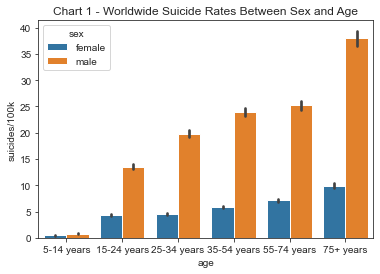

In [62]:
suicide_world ['age'] = pd.Categorical (suicide_world ['age'], ["5-14 years","15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
# Barplot illustrating world wide suicide rates per 100k people between sex and age
sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})
sns.set_palette("tab10") 
sns.barplot (x=suicide_world ['age'], y= suicide_world['suicides/100k'], hue=suicide_world ["sex"]).set(title='Chart 1 - Worldwide Suicide Rates Between Sex and Age')
plt.show ()

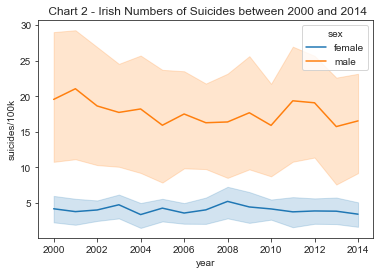

In [63]:
# Line plot comparing number of suicides per 100k people between sex between 2000 and 2014 in Ireland

sns.lineplot(data=suicide_ireland14, x="year", y="suicides/100k", hue="sex").set(title=' Chart 2 - Irish Numbers of Suicides between 2000 and 2014')
plt.show()

<AxesSubplot:title={'center':'Cahrt 3 - Irish VS Worldwide Numbers of Suicides'}, xlabel='year', ylabel='suicides/100k'>

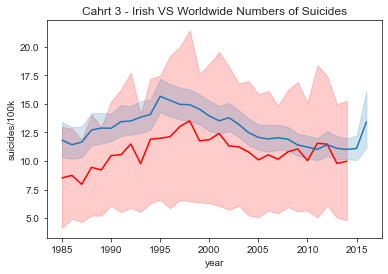

In [64]:
# Lineplot comparing Irish numbers of suicides per 100k people with worldwide numbers between 1985 and 2016 
# Ireland in red 
#World in blue 

x = np.arange(10)
sns.lineplot(data=suicide_ireland, x="year", y="suicides/100k", color="red").set(title='Cahrt 3 - Irish VS Worldwide Numbers of Suicides')
sns.lineplot(data=suicide_world, x="year", y="suicides/100k")


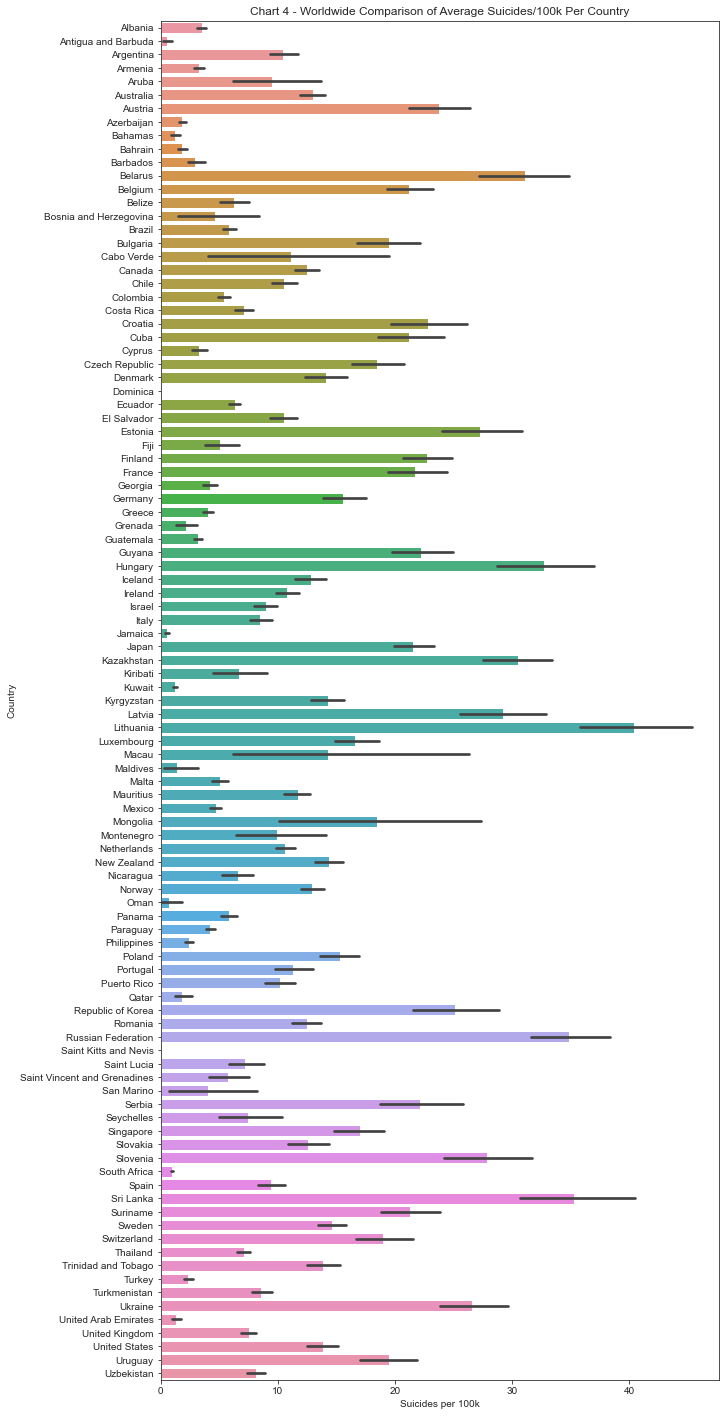

In [65]:
# Barplot illustrating average number of suicides per 100k people per country
plt.figure(figsize=(10,25))
sns.barplot (x=suicide['suicides/100k'], y= suicide ['country'])
plt.xlabel('Suicides per 100k')
plt.ylabel('Country')
plt.title('Chart 4 - Worldwide Comparison of Average Suicides/100k Per Country')
plt.show()